<a href="https://colab.research.google.com/github/lucascheng24/COMP4432ML-DataProduct-A_Million_News_Headlines/blob/main/analysis/analysis_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
url = 'https://raw.githubusercontent.com/lucascheng24/COMP4432ML-DataProduct-A_Million_News_Headlines/main/raw_data/abcnews-date-text.csv'


df = pd.read_csv(url)

headlines = df['headline_text']

In [2]:
df.shape

(1244184, 2)

In [3]:
# drop duplicates based on specific columns
df_unique = df.drop_duplicates(subset='headline_text')

In [4]:
df_unique.shape

(1213004, 2)

In [5]:
headlines

0          aba decides against community broadcasting lic...
1             act fire witnesses must be aware of defamation
2             a g calls for infrastructure protection summit
3                   air nz staff in aust strike for pay rise
4              air nz strike to affect australian travellers
                                 ...                        
1244179    two aged care residents die as state records 2...
1244180    victoria records 5;919 new cases and seven deaths
1244181      wa delays adopting new close contact definition
1244182    western ringtail possums found badly dehydrate...
1244183    what makes you a close covid contact here are ...
Name: headline_text, Length: 1244184, dtype: object

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
# print("stop_words:")
# stop_words
punctuation = set(string.punctuation)
# punctuation

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    return tokens

preprocessed_headlines = [preprocess(headline) for headline in headlines]

In [8]:
preprocessed_headlines

[['aba', 'decides', 'community', 'broadcasting', 'licence'],
 ['act', 'fire', 'witnesses', 'must', 'aware', 'defamation'],
 ['g', 'calls', 'infrastructure', 'protection', 'summit'],
 ['air', 'nz', 'staff', 'aust', 'strike', 'pay', 'rise'],
 ['air', 'nz', 'strike', 'affect', 'australian', 'travellers'],
 ['ambitious', 'olsson', 'wins', 'triple', 'jump'],
 ['antic', 'delighted', 'record', 'breaking', 'barca'],
 ['aussie', 'qualifier', 'stosur', 'wastes', 'four', 'memphis', 'match'],
 ['aust', 'addresses', 'un', 'security', 'council', 'iraq'],
 ['australia', 'locked', 'war', 'timetable', 'opp'],
 ['australia', 'contribute', '10', 'million', 'aid', 'iraq'],
 ['barca', 'take', 'record', 'robson', 'celebrates', 'birthday'],
 ['bathhouse', 'plans', 'move', 'ahead'],
 ['big', 'hopes', 'launceston', 'cycling', 'championship'],
 ['big', 'plan', 'boost', 'paroo', 'water', 'supplies'],
 ['blizzard', 'buries', 'united', 'states', 'bills'],
 ['brigadier', 'dismisses', 'reports', 'troops', 'harassed'

In [9]:
from collections import Counter

# Flatten the list of words
words = [word for sublist in preprocessed_headlines for word in sublist]

# Count the word frequency
word_freq = Counter(words)



In [10]:
print('word token: ', len(word_freq))

word token 107912


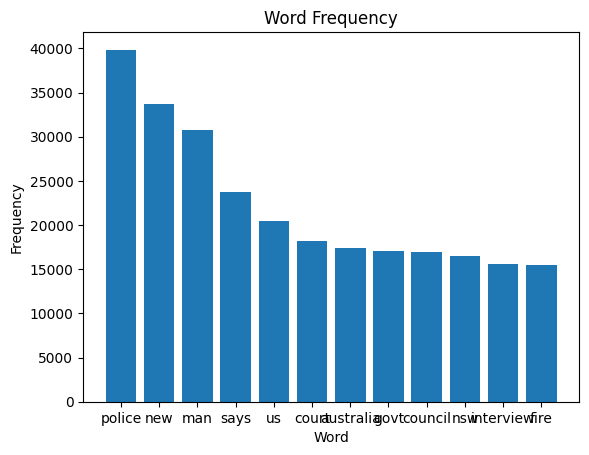

<Figure size 120000x6000 with 0 Axes>

In [23]:
top_words = word_freq.most_common(12)
word_labels = [word[0] for word in top_words]
word_counts = [word[1] for word in top_words]

# Create a bar chart
plt.bar(word_labels, word_counts)
plt.title('Word Frequency')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.figure(figsize=(600, 30), dpi=200)
plt.show()

In [ ]:
# Print the word frequency in a tabular format
for word, freq in word_freq.most_common(200):
    word_formatted = word.ljust(15)
    print(f"{word_formatted}{freq}")

police         39851
new            33734
man            30760
says           23732
us             20424
court          18187
australia      17416
govt           17104
council        16988
nsw            16544
interview      15595
fire           15532
australian     13647
wa             13505
sydney         13246
plan           13002
water          12860
death          12778
qld            12602
crash          12379
health         11981
back           11240
charged        11195
murder         10553
report         10539
sa             10411
day            10380
government     10061
call           10021
coast          9748
world          9699
hospital       9678
car            9617
calls          9613
woman          9594
south          9551
two            9516
may            9445
election       9255
home           9210
found          9104
first          9089
win            9018
coronavirus    8945
killed         8885
accused        8839
china          8579
north          8492
missing    

In [ ]:
# Print the word frequency in a tabular format
for word, freq in word_freq.most_common(1000):
    word_formatted = word.ljust(15)
    print(f"{word_formatted}{freq}")

police         39851
new            33734
man            30760
says           23732
us             20424
court          18187
australia      17416
govt           17104
council        16988
nsw            16544
interview      15595
fire           15532
australian     13647
wa             13505
sydney         13246
plan           13002
water          12860
death          12778
qld            12602
crash          12379
health         11981
back           11240
charged        11195
murder         10553
report         10539
sa             10411
day            10380
government     10061
call           10021
coast          9748
world          9699
hospital       9678
car            9617
calls          9613
woman          9594
south          9551
two            9516
may            9445
election       9255
home           9210
found          9104
first          9089
win            9018
coronavirus    8945
killed         8885
accused        8839
china          8579
north          8492
missing    

In [ ]:
vocab_size = len(set(words))
num_tokens = len(words)
avg_headline_length = sum([len(headline) for headline in preprocessed_headlines]) / len(preprocessed_headlines)

print(f"Vocabulary size: {vocab_size}")
print(f"Number of headline tokens: {num_tokens}")
print(f"Average headline length: {avg_headline_length:.2f}")

Vocabulary size: 107912
Number of headline tokens: 6765736
Average headline length: 5.44


In [11]:
df.head(10)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
5,20030219,ambitious olsson wins triple jump
6,20030219,antic delighted with record breaking barca
7,20030219,aussie qualifier stosur wastes four memphis match
8,20030219,aust addresses un security council over iraq
9,20030219,australia is locked into war timetable opp
